In [377]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [378]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [379]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [380]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [381]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


**No Skew in data (Mean and median are closer to each other)**

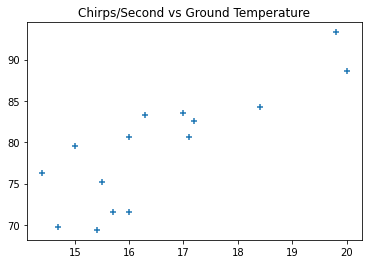

In [382]:
plt.scatter(x = df['Chirps/Second'],y = df['Ground Temperature'],marker = '+')
plt.title('Chirps/Second vs Ground Temperature')
plt.show()

In [383]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


1.   **Has a linear relationship**
2.   **No transformation required**

In [384]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [385]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 8)

In [386]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10, 1), (5, 1), (10,), (5,))

1. Find the linear regression equation for this data.

In [387]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()   
regressor.fit(X_train, y_train)

LinearRegression()

In [388]:
print(regressor.coef_)
print(regressor.intercept_)

[0.20048028]
0.7325144293558346


The Linear Regression equation is : **y = 0.2x + 0.7325**

2. Chart the original data and the equation on the chart.

In [389]:
y_pred1=regressor.predict(X_train)
y_pred1

array([16.69074443, 15.08690222, 18.49506692, 16.02915952, 14.64584561,
       15.80863121, 17.43252145, 15.08690222, 16.8912247 , 17.63300173])

In [390]:
df_train = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred1})
df_train

,Actual,Predicted
0,15.0,16.690744
1,15.7,15.086902
2,20.0,18.495067
3,14.4,16.029160
4,15.4,14.645846
5,15.5,15.808631
6,16.3,17.432521
7,16.0,15.086902
8,17.1,16.891225
9,18.4,17.633002


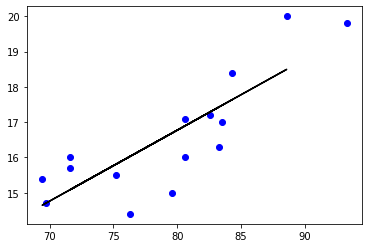

In [391]:
plt.scatter(X,y, color='blue')
plt.plot(X_train,y_pred1, color='black')
plt.show()

3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [392]:
y_pred = regressor.predict(X_test)
y_pred

array([14.70598969, 17.29218526, 19.43732421, 16.8912247 , 17.47261751])

In [393]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
0,14.7,14.705990
1,17.2,17.292185
2,19.8,19.437324
3,16.0,16.891225
4,17.0,17.472618


In [394]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9181941418228047


The value of R2 is 0.91 which is more than 0.8, so there is good correlation.

4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [395]:
y_prd=regressor.predict([[95]])
y_prd

array([19.77814068])

5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning?

In [396]:
y=18
x=(y-0.7325)/0.2
x

86.33749999999999

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [397]:
df = pd.read_fwf("brain_body.txt")

In [398]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [399]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [400]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000




*   **Max value is an Outlier**
*   **Mean and median has large difference, data is right skewed**



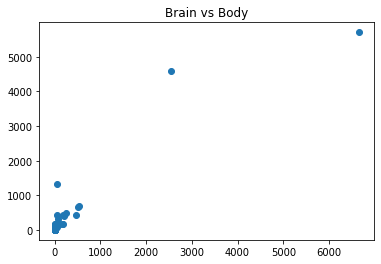

In [401]:
plt.scatter(x=df['Brain'],y=df['Body'],marker = 'o')
plt.title('Brain vs Body')
plt.show()

In [402]:
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [403]:
# brain_q3 = df.Brain.quantile(0.75)
# brain_q1 = df.Brain.quantile(0.25)
# iqr = brain_q3 - brain_q1

In [404]:
# maxi = brain_q3 + (1.5 * iqr)

In [405]:
# mini = brain_q1 - (1.5 * iqr)

In [406]:
# df.Brain = df.Brain.clip(mini,maxi)

In [407]:
X = df[['Body']].values
y = df[['Brain']].values
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 8)

In [408]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43, 1), (19, 1), (43, 1), (19, 1))

In [409]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [410]:
print(regressor.intercept_) #c
print(regressor.coef_) #m

[-2.70919476]
[[0.56044437]]


In [411]:
y_pred = regressor.predict(X_test)
y_pred

array([[ 5.97769293e+00],
       [-1.36412828e+00],
       [-1.02786166e+00],
       [ 2.24831218e+02],
       [ 9.89738065e-01],
       [-2.14875039e+00],
       [ 1.16381810e+01],
       [ 2.55372013e+01],
       [-2.52424812e+00],
       [ 4.18427096e+00],
       [ 6.17419074e+01],
       [ 2.86756898e+01],
       [ 4.18427096e+00],
       [ 7.37077370e+02],
       [ 3.19854903e+03],
       [ 1.92602244e+01],
       [-1.25203940e+00],
       [ 2.22305796e+01],
       [-2.03666152e+00]])

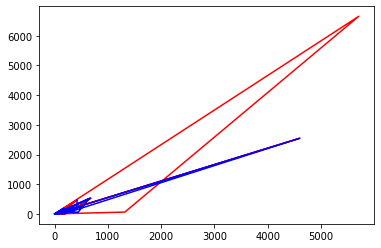

In [412]:
plt.plot(X,y, color='red')
plt.plot(X_train,y_train, color='blue')
plt.show()

In [413]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7030117334191364


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [414]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [415]:
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [416]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


**No Skew in data (Mean and median are closer to each other)**

In [417]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


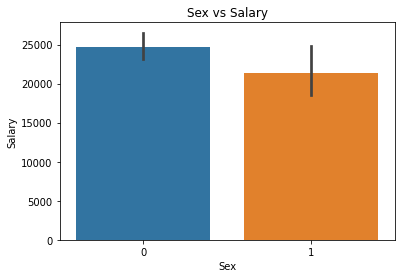

In [418]:
import seaborn as sns
sns.barplot(data=df,x='Sex',y='Salary')
plt.title('Sex vs Salary')
df[['Sex', 'Salary']].corr()

**Has a linear relationship**

In [419]:
df.groupby('Sex')['Salary'].max()

Sex
0    36350
1    38045
Name: Salary, dtype: int64

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


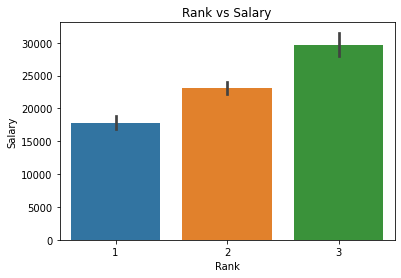

In [420]:
sns.barplot(data=df,x='Rank',y='Salary',order=df.groupby('Rank')['Salary'].mean().reset_index().sort_values('Salary')['Rank'])
plt.title('Rank vs Salary')
df[['Rank', 'Salary']].corr()

**Has a linear relationship**

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


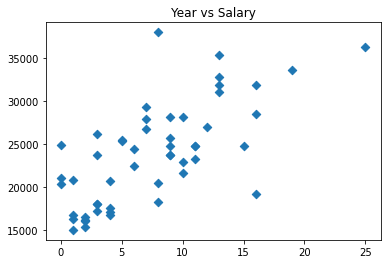

In [421]:
plt.scatter(df['Year'],df['Salary'],marker = 'D')
plt.title('Year vs Salary')
df[['Year', 'Salary']].corr()

**Has a linear relationship**

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


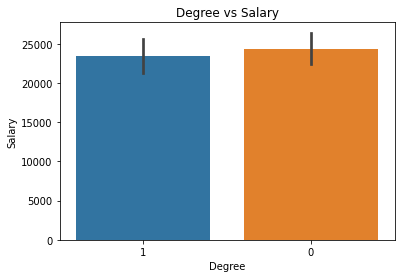

In [422]:
sns.barplot(data=df,x='Degree',y='Salary',order=df.groupby('Degree')['Salary'].mean().reset_index().sort_values('Salary')['Degree'])
plt.title('Degree vs Salary')
df[['Degree', 'Salary']].corr()

**No linear relationship**

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


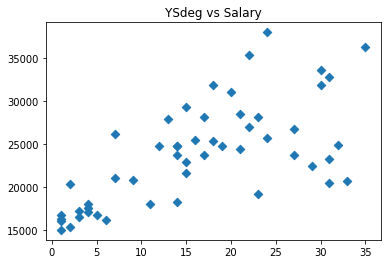

In [423]:
plt.scatter(df['YSdeg'],df['Salary'],marker = 'D')
plt.title('YSdeg vs Salary')
df[['YSdeg', 'Salary']].corr()

**Has a linear relationship**

In [424]:
X= df[['Sex','Rank','Year','YSdeg']].values
y= df[['Salary']].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [425]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [426]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [427]:
print(regressor.intercept_)
print(regressor.coef_)

[9814.36968417]
[[1143.94635066 5472.91247423  449.61251588  -61.58427036]]


In [428]:
y_pred = regressor.predict(X_test)
y_pred

array([[21677.94228776],
       [16839.39514049],
       [26334.28123401],
       [22815.87223814],
       [29312.7940474 ],
       [20003.58961247],
       [16389.78262461],
       [18471.61501629],
       [24843.75252228],
       [32928.2167978 ],
       [30273.60334952]])

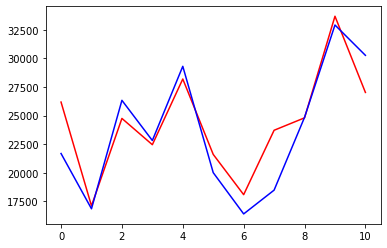

In [429]:
plt.plot(y_test, color='red')
plt.plot(y_pred, color='blue')
plt.show()

In [430]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.6849913790081124
